In [33]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Data collection

In [2]:
## Load the data and concatenate them into a single DataFrame
lung1 = pd.read_csv("lung/GSE87340.csv.zip")
lung2 = pd.read_csv("lung/GSE60052.csv.zip")
lung3 = pd.read_csv("lung/GSE40419.csv.zip")
lung4 = pd.read_csv("lung/GSE37764.csv.zip")
lung_1_4 = pd.concat([lung1, lung2, lung3, lung4])

In [3]:
## Print the first 5 rows and 10 columns
print(lung_1_4.iloc[:,0:10].head())

           ID    class  ENSG00000000003  ENSG00000000005  ENSG00000000419  \
0  SRR4296063   Normal        10.728260         4.668142        10.278195   
1  SRR4296064    Tumor        11.332606         2.329988        10.127734   
2  SRR4296065   Normal         9.951182         4.264426        10.288874   
3  SRR4296066    Tumor        12.185680         2.798643        10.178582   
4  SRR4296067   Normal         9.875179         2.922071        10.444479   

   ENSG00000000457  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
0        10.184036         8.215333        11.310861        13.178872   
1        10.167900         8.174060        10.399611        13.208972   
2        10.093258         8.011385        11.814572        14.038661   
3        10.401606         8.902321        10.294009        13.170466   
4        10.435843         8.692961        12.604934        13.538341   

   ENSG00000001036  
0        11.469473  
1        11.510862  
2        11.651766  
3        11.54

# Data Preprocessing

In [4]:
## Print the total number of missing values for each columns
print(lung_1_4.isna().sum())

ID                 0
class              0
ENSG00000000003    0
ENSG00000000005    0
ENSG00000000419    0
                  ..
ENSG00000285990    0
ENSG00000285991    0
ENSG00000285992    0
ENSG00000285993    0
ENSG00000285994    0
Length: 58737, dtype: int64


In [5]:
## Print the total number of missing values for all gene expression columns combined together
print(lung_1_4.isna().sum().sum())

0


# EDA

In [6]:
## plotting the distribution of samples corresponding to each lung cancer type
df = lung_1_4['class'].value_counts().reset_index()

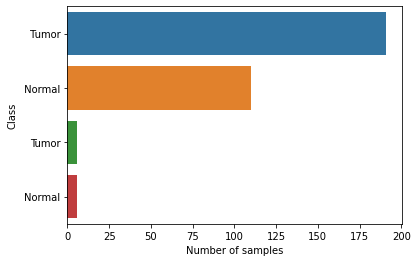

In [7]:
## visualize the classes
sns.barplot(x = "class", y = "index", data=df)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

In [8]:
## Look at the different classes closely
print(set(lung_1_4['class']))

{' Tumor', ' Normal', 'Normal', 'Tumor'}


In [11]:
## rename those right away using the following replace method
lung_1_4['class'] = lung_1_4['class'].replace(' Normal', 'Normal')
lung_1_4['class'] = lung_1_4['class'].replace(' Tumor', 'Tumor')

In [13]:
print(set(lung_1_4['class']))

{'Tumor', 'Normal'}


In [14]:
## plotting the distribution of samples corresponding to each lung cancer type
df = lung_1_4['class'].value_counts().reset_index()

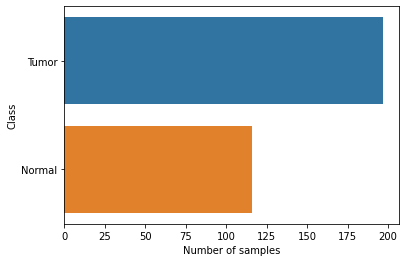

In [15]:
## visualize the classes after fixing the columns
sns.barplot(x = "class", y = "index", data=df)
plt.xlabel("Number of samples")
plt.ylabel("Class")
plt.show()

# Data transformation


In [16]:
## Restrict our dataset to the first 10 columns and convert the data from wide format to long format
lung_1_4_m = pd.melt(lung_1_4.iloc[:,1:12], id_vars = "class")

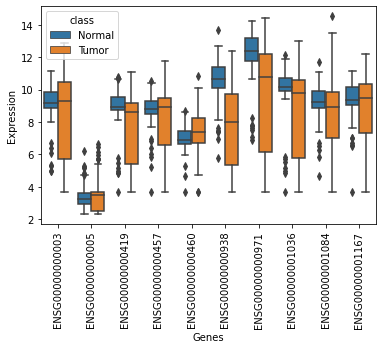

In [17]:
## Visualization for the distribution of expression across selected samples
ax = sns.boxplot(x = "variable" , y = "value", data = lung_1_4_m, hue = "class")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("Genes")
plt.ylabel("Expression")
plt.show()

# Data splitting

In [18]:
## Drop the ID and class columns in the dataset, and convert it to a NumPy ndarray
x_data = lung_1_4.drop(['class', 'ID'], axis = 1).values

In [19]:
## Create a NumPy ndarray for the labels from the subset data
y_data = lung_1_4['class'].values

In [20]:
## Convert the categorical data to numbers
classes = lung_1_4['class'].unique().tolist()
print(classes)

['Normal', 'Tumor']


In [21]:
## Convert the classes into ordinals
func = lambda x: classes.index(x)
y_data = np.asarray([func(i) for i in y_data], dtype ="float32")

In [22]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size=0.25, stratify = y_data)

# Model training

In [24]:
## Instantiating an object using the LogisticRegression function
model_lung1 = LogisticRegression()

In [25]:
## Fit the training data consisting of features and labels
model_lung1.fit(X_train, y_train)

/Users/ukdevisetty/miniconda3/envs/condon_optimzation/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [26]:
# Model predictions on a single sample
pred = model_lung1.predict(X_test[12].reshape(1,-1))
print(pred)

[1.]


In [27]:
## Model predictions on all samples from the test data
all_pred_lung= model_lung1.predict(X_test)

In [28]:
## Accuracy score
print(model_lung1.score(X_test, y_test))

0.9620253164556962


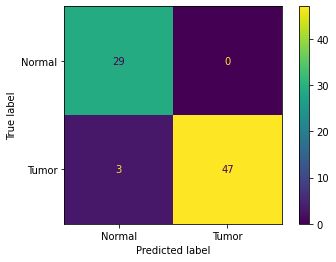

In [31]:
## Confusion matrix
cm = confusion_matrix(y_test, all_pred_lung)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels = ["Normal", 'Tumor'])
disp.plot()
plt.show()

In [34]:
## Classification report
classification_report(y_test, all_pred_lung)

'              precision    recall  f1-score   support\n\n         0.0       0.91      1.00      0.95        29\n         1.0       1.00      0.94      0.97        50\n\n    accuracy                           0.96        79\n   macro avg       0.95      0.97      0.96        79\nweighted avg       0.97      0.96      0.96        79\n'